# Addestramento mediante RFDs

In [1]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

## 1. Inizializzazione dataset

In [2]:
def initialize_data(dataset, type, threshold, percentage = 100):
    train_path = dataset

    # lettura dataset
    train_df = pd.read_csv(train_path,sep=';',encoding = "ISO-8859-1")
    train_df = train_df.fillna(1)
    print("The dataset",dataset.split("/")[2],"has been read!")

    # divide le colonne originali dalle colonne con RFDs
    last_n_columns  = train_df.iloc[: , -(len(train_df.axes[1])-16):]
    native_columns = train_df.iloc[: , :16]
    print("Selection of the last 16 columns!")

    # ordina e seleziona le colonne che superano la threshold
    last_n_columns = last_n_columns.sort_values(by = 9019, axis = 1)
    first_selected_columns = last_n_columns.iloc[: , :(int((len(last_n_columns.axes[1])*percentage)/100))]
    print("Sorting and selecting first column!")

    number_of_columns_to_select = 0
    occurrence = False

    for i in range(0, len(first_selected_columns.axes[1])):
        if first_selected_columns.loc[9019][i] > threshold:
            occurrence = True
            number_of_columns_to_select = i-1
            break

    print("number_of_columns_to_select:",number_of_columns_to_select)
    if occurrence:
        final_selected_columns = first_selected_columns.iloc[: , :number_of_columns_to_select]
    else:
        final_selected_columns = first_selected_columns

    # type = 1 full dataset, type = 2 dataset sole RFDs
    label_encoder = preprocessing.LabelEncoder()
    if type == 1:
        train_df = pd.concat([native_columns, final_selected_columns], axis=1)
        train_df = train_df.iloc[:-1 , :]
        print("Number of columns: ", train_df.shape[1])
        Y = label_encoder.fit_transform(train_df["class"])
        del train_df["class"]
    else:
        train_df = pd.concat([final_selected_columns, native_columns['class']], axis=1)
        train_df = train_df.iloc[:-1 , :]
        print("Number of columns: ", train_df.shape[1])
        Y = label_encoder.fit_transform(train_df["class"])
        del train_df["class"]

    # divide il dataset in train e test
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

    for train_index, test_index in sss.split(train_df, Y):
        x_train, x_test = train_df.loc[train_index], train_df.loc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

    return x_train, x_test, y_train, y_test

## 2. Prediction dei modelli con migliori iperparametri

In [3]:
def KNN_prediction():
    best_params = {'algorithm': 'ball_tree',
                   'metric': 'euclidean',
                   'n_neighbors': 3,
                   'weights': 'distance'
                   }

    knn = KNeighborsClassifier(**best_params)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)

    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for KNN on Test data: ",accuracy_value)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix, '\n')
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def RF_prediction():
    best_params = {'max_depth': 10,
                   'max_features': 'sqrt',
                   'max_samples': None,
                   'n_estimators': 50
                   }

    rfc = RandomForestClassifier(random_state=42, **best_params)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)

    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for RF on Test data: ",accuracy_value)

    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def DT_prediction():
    best_params = {'criterion': 'gini',
                   'max_depth': 10,
                   'max_features': 10,
                   'max_leaf_nodes': 15,
                   'min_samples_leaf': 2,
                   'min_samples_split': 3
                   }

    dt = DecisionTreeClassifier(random_state=42, **best_params)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)

    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for Decision Tree on Test data: ",accuracy_value)

    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def SVC_prediction():
    best_params = {'C': 1.5,
                   'coef0': 1.0,
                   'degree': 3,
                   'gamma': 1,
                   'kernel': 'poly'
                   }

    svc = SVC(random_state=42, **best_params)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)

    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for SVC on Test data: ",accuracy_value)

    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def LR_prediction():
    best_params = {'C': 1.0,
                   'fit_intercept': True,
                   'max_iter': 500,
                   'penalty': None,
                   'solver': 'lbfgs'
                   }

    lr = LogisticRegression(random_state=42, **best_params)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    accuracy_value = accuracy_score(y_test, y_pred)
    print("Accuracy for Logistic Regression on Test data: ",accuracy_value)

    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix)

    return accuracy_value, report, df_cm

def draw_confusion(df_cm, title, filename):
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt=".0f")
    plt.title(title)
    plt.savefig("{}-confusion.pdf".format(filename))
    #plt.show()
    plt.cla()
    plt.clf()

## 3. Risultati

### 3.1 Dataset RFDs+16

In [4]:
warnings.filterwarnings('ignore')

full_datasets = ["../datasets/rfds_0_with_chi.csv",
                 "../datasets/rfds_2_with_chi.csv", "../datasets/rfds_4_with_chi.csv"]

dataframes_results = []
results_dict = {}

for dataset_name in full_datasets:
    type = 1
    comparison_thr = dataset_name.split("_")[1]
    for thr in [0.1]:
        x_train, x_test, y_train, y_test = initialize_data(dataset_name, type, thr)

        _, report_RF, df_cm_RF = RF_prediction()
        #draw_confusion(df_cm_RF, 'RF Confusion Matrix Correlation-Coefficient', "RF_thr_{}".format(thr))
        results_dict['RF_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_RF
        report_RF['dataset'] = dataset_name.split("/")[2]
        report_RF['comparison_thr'] = comparison_thr
        report_RF['model'] = 'RF'
        report_RF['thr'] = thr
        report_RF['type'] = type
        report_RF['TP'] = df_cm_RF[0][0]
        report_RF['FP'] = df_cm_RF[0][1]
        report_RF['FN'] = df_cm_RF[1][0]
        report_RF['TN'] = df_cm_RF[1][1]

        _, report_DT, df_cm_DT = DT_prediction()
        #draw_confusion(df_cm_DT, 'DT Confusion Matrix Correlation-Coefficient', "DT_thr_{}".format(thr))
        results_dict['DT_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_DT
        report_DT['dataset'] = dataset_name.split("/")[2]
        report_DT['comparison_thr'] = comparison_thr
        report_DT['model'] = 'DT'
        report_DT['thr'] = thr
        report_DT['type'] = type
        report_DT['TP'] = df_cm_DT[0][0]
        report_DT['FP'] = df_cm_DT[0][1]
        report_DT['FN'] = df_cm_DT[1][0]
        report_DT['TN'] = df_cm_DT[1][1]

        _, report_SVC, df_cm_SVC = SVC_prediction()
        #draw_confusion(df_cm_SVC, 'SVC Confusion Matrix Correlation-Coefficient', "SVC_thr_{}".format(thr))
        results_dict['SVC_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_SVC
        report_SVC['dataset'] = dataset_name.split("/")[2]
        report_SVC['comparison_thr'] = comparison_thr
        report_SVC['model'] = 'SVC'
        report_SVC['thr'] = thr
        report_SVC['type'] = type
        report_SVC['TP'] = df_cm_SVC[0][0]
        report_SVC['FP'] = df_cm_SVC[0][1]
        report_SVC['FN'] = df_cm_SVC[1][0]
        report_SVC['TN'] = df_cm_SVC[1][1]

        _, report_LR, df_cm_LR = LR_prediction()
        #draw_confusion(df_cm_LR, 'LR Confusion Matrix Correlation-Coefficient', "LR_thr_{}".format(thr))
        results_dict['LR_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_LR
        report_LR['dataset'] = dataset_name.split("/")[2]
        report_LR['comparison_thr'] = comparison_thr
        report_LR['model'] = 'LR'
        report_LR['thr'] = thr
        report_LR['type'] = type
        report_LR['TP'] = df_cm_LR[0][0]
        report_LR['FP'] = df_cm_LR[0][1]
        report_LR['FN'] = df_cm_LR[1][0]
        report_LR['TN'] = df_cm_LR[1][1]

        _, report_KNN, df_cm_KNN = KNN_prediction()
        #draw_confusion(df_cm_KNN, 'KNN Confusion Matrix Correlation-Coefficient', "KNN_thr_{}".format(thr))
        results_dict['KNN_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_KNN
        report_KNN['dataset'] = dataset_name.split("/")[2]
        report_KNN['comparison_thr'] = comparison_thr
        report_KNN['model'] = 'KNN'
        report_KNN['thr'] = thr
        report_KNN['type'] = type
        report_KNN['TP'] = df_cm_KNN[0][0]
        report_KNN['FP'] = df_cm_KNN[0][1]
        report_KNN['FN'] = df_cm_KNN[1][0]
        report_KNN['TN'] = df_cm_KNN[1][1]

warnings.resetwarnings()

The dataset rfds_0_with_chi.csv has been read!
Selection of the last 16 columns!
Sorting and selecting first column!
number_of_columns_to_select: 2
Number of columns:  18
Accuracy for RF on Test data:  0.9985067197610752
{'0': {'precision': 0.999001996007984, 'recall': 0.9980059820538385, 'f1-score': 0.9985037406483791, 'support': 1003.0}, '1': {'precision': 0.9980139026812314, 'recall': 0.9990059642147118, 'f1-score': 0.9985096870342772, 'support': 1006.0}, 'accuracy': 0.9985067197610752, 'macro avg': {'precision': 0.9985079493446076, 'recall': 0.9985059731342751, 'f1-score': 0.9985067138413282, 'support': 2009.0}, 'weighted avg': {'precision': 0.9985072115944882, 'recall': 0.9985067197610752, 'f1-score': 0.9985067182811385, 'support': 2009.0}}
[[1001    2]
 [   1 1005]]
Accuracy for Decision Tree on Test data:  0.9975111996017919
{'0': {'precision': 0.9950396825396826, 'recall': 1.0, 'f1-score': 0.9975136747886624, 'support': 1003.0}, '1': {'precision': 1.0, 'recall': 0.9950298210735

In [5]:
dfs = []
for val in results_dict:
    d = pd.json_normalize(results_dict[val])
    dfs.append(d)

In [6]:
dftmp = pd.concat(dfs)
dftmp

,accuracy,dataset,comparison_thr,model,thr,type,TP,FP,FN,TN,...,1.f1-score,1.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support
0,0.998507,rfds_0_with_chi.csv,0,RF,0.1,1,1001,1,2,1005,...,0.998510,1006.0,0.998508,0.998506,0.998507,2009.0,0.998507,0.998507,0.998507,2009.0
0,0.997511,rfds_0_with_chi.csv,0,DT,0.1,1,1003,5,0,1001,...,0.997509,1006.0,0.997520,0.997515,0.997511,2009.0,0.997524,0.997511,0.997511,2009.0
0,0.983076,rfds_0_with_chi.csv,0,SVC,0.1,1,982,13,21,993,...,0.983168,1006.0,0.983112,0.983070,0.983076,2009.0,0.983107,0.983076,0.983076,2009.0
0,0.929318,rfds_0_with_chi.csv,0,LR,0.1,1,901,40,102,966,...,0.931533,1006.0,0.930993,0.929272,0.929244,2009.0,0.930954,0.929318,0.929247,2009.0
0,0.986063,rfds_0_with_chi.csv,0,KNN,0.1,1,982,7,21,999,...,0.986180,1006.0,0.986167,0.986052,0.986062,2009.0,0.986157,0.986063,0.986062,2009.0
0,0.998009,rfds_2_with_chi.csv,2,RF,0.1,1,1000,1,3,1005,...,0.998014,1006.0,0.998012,0.998007,0.998009,2009.0,0.998011,0.998009,0.998009,2009.0
0,0.998507,rfds_2_with_chi.csv,2,DT,0.1,1,1002,2,1,1004,...,0.998508,1006.0,0.998506,0.998507,0.998507,2009.0,0.998507,0.998507,0.998507,2009.0
0,0.982578,rfds_2_with_chi.csv,2,SVC,0.1,1,985,17,18,989,...,0.982613,1006.0,0.982580,0.982578,0.982578,2009.0,0.982579,0.982578,0.982578,2009.0
0,0.928820,rfds_2_with_chi.csv,2,LR,0.1,1,900,40,103,966,...,0.931084,1006.0,0.930548,0.928773,0.928743,2009.0,0.930507,0.928820,0.928747,2009.0
0,0.986063,rfds_2_with_chi.csv,2,KNN,0.1,1,982,7,21,999,...,0.986180,1006.0,0.986167,0.986052,0.986062,2009.0,0.986157,0.986063,0.986062,2009.0


In [ ]:
dftmp.to_csv("Results_Fake_Account_Models_RFD+16.csv",index=None,sep=";")

### 3.2 Dataset solo RFDs

In [7]:
warnings.filterwarnings('ignore')

full_datasets = ["../datasets/rfds_0_with_chi.csv",
                 "../datasets/rfds_2_with_chi.csv", "../datasets/rfds_4_with_chi.csv"]

dataframes_results = []
results_dict = {}

for dataset_name in full_datasets:
    type = 2
    comparison_thr = dataset_name.split("_")[1]
    for thr in [0.1]:
        x_train, x_test, y_train, y_test = initialize_data(dataset_name, type, thr)

        _, report_RF, df_cm_RF = RF_prediction()
        #draw_confusion(df_cm_RF, 'RF Confusion Matrix Correlation-Coefficient', "RF_thr_{}".format(thr))
        results_dict['RF_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_RF
        report_RF['dataset'] = dataset_name.split("/")[2]
        report_RF['comparison_thr'] = comparison_thr
        report_RF['model'] = 'RF'
        report_RF['thr'] = thr
        report_RF['type'] = type
        report_RF['TP'] = df_cm_RF[0][0]
        report_RF['FP'] = df_cm_RF[0][1]
        report_RF['FN'] = df_cm_RF[1][0]
        report_RF['TN'] = df_cm_RF[1][1]

        _, report_DT, df_cm_DT = DT_prediction()
        #draw_confusion(df_cm_DT, 'DT Confusion Matrix Correlation-Coefficient', "DT_thr_{}".format(thr))
        results_dict['DT_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_DT
        report_DT['dataset'] = dataset_name.split("/")[2]
        report_DT['comparison_thr'] = comparison_thr
        report_DT['model'] = 'DT'
        report_DT['thr'] = thr
        report_DT['type'] = type
        report_DT['TP'] = df_cm_DT[0][0]
        report_DT['FP'] = df_cm_DT[0][1]
        report_DT['FN'] = df_cm_DT[1][0]
        report_DT['TN'] = df_cm_DT[1][1]

        _, report_SVC, df_cm_SVC = SVC_prediction()
        #draw_confusion(df_cm_SVC, 'SVC Confusion Matrix Correlation-Coefficient', "SVC_thr_{}".format(thr))
        results_dict['SVC_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_SVC
        report_SVC['dataset'] = dataset_name.split("/")[2]
        report_SVC['comparison_thr'] = comparison_thr
        report_SVC['model'] = 'SVC'
        report_SVC['thr'] = thr
        report_SVC['type'] = type
        report_SVC['TP'] = df_cm_SVC[0][0]
        report_SVC['FP'] = df_cm_SVC[0][1]
        report_SVC['FN'] = df_cm_SVC[1][0]
        report_SVC['TN'] = df_cm_SVC[1][1]

        _, report_LR, df_cm_LR = LR_prediction()
        #draw_confusion(df_cm_LR, 'LR Confusion Matrix Correlation-Coefficient', "LR_thr_{}".format(thr))
        results_dict['LR_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_LR
        report_LR['dataset'] = dataset_name.split("/")[2]
        report_LR['comparison_thr'] = comparison_thr
        report_LR['model'] = 'LR'
        report_LR['thr'] = thr
        report_LR['type'] = type
        report_LR['TP'] = df_cm_LR[0][0]
        report_LR['FP'] = df_cm_LR[0][1]
        report_LR['FN'] = df_cm_LR[1][0]
        report_LR['TN'] = df_cm_LR[1][1]

        _, report_KNN, df_cm_KNN = KNN_prediction()
        #draw_confusion(df_cm_KNN, 'KNN Confusion Matrix Correlation-Coefficient', "KNN_thr_{}".format(thr))
        results_dict['KNN_{}_{}_{}'.format(dataset_name, str(thr).replace(".","-"), type)] = report_KNN
        report_KNN['dataset'] = dataset_name.split("/")[2]
        report_KNN['comparison_thr'] = comparison_thr
        report_KNN['model'] = 'KNN'
        report_KNN['thr'] = thr
        report_KNN['type'] = type
        report_KNN['TP'] = df_cm_KNN[0][0]
        report_KNN['FP'] = df_cm_KNN[0][1]
        report_KNN['FN'] = df_cm_KNN[1][0]
        report_KNN['TN'] = df_cm_KNN[1][1]

warnings.resetwarnings()

The dataset rfds_0_with_chi.csv has been read!
Selection of the last 16 columns!
Sorting and selecting first column!
number_of_columns_to_select: 2
Number of columns:  3
Accuracy for RF on Test data:  0.5898456943753111
{'0': {'precision': 1.0, 'recall': 0.17846460618145563, 'f1-score': 0.30287648054145516, 'support': 1003.0}, '1': {'precision': 0.5497267759562842, 'recall': 1.0, 'f1-score': 0.7094499294781382, 'support': 1006.0}, 'accuracy': 0.5898456943753111, 'macro avg': {'precision': 0.7748633879781421, 'recall': 0.5892323030907278, 'f1-score': 0.5061632050097967, 'support': 2009.0}, 'weighted avg': {'precision': 0.7745271959243514, 'recall': 0.5898456943753111, 'f1-score': 0.506466769058281, 'support': 2009.0}}
[[ 179  824]
 [   0 1006]]
Accuracy for Decision Tree on Test data:  0.5898456943753111
{'0': {'precision': 1.0, 'recall': 0.17846460618145563, 'f1-score': 0.30287648054145516, 'support': 1003.0}, '1': {'precision': 0.5497267759562842, 'recall': 1.0, 'f1-score': 0.70944992

In [8]:
dfs = []
for val in results_dict:
    d = pd.json_normalize(results_dict[val])
    dfs.append(d)

In [9]:
dftmp = pd.concat(dfs)
dftmp

,accuracy,dataset,comparison_thr,model,thr,type,TP,FP,FN,TN,...,1.f1-score,1.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support
0,0.589846,rfds_0_with_chi.csv,0,RF,0.1,2,179,0,824,1006,...,0.709450,1006.0,0.774863,0.589232,0.506163,2009.0,0.774527,0.589846,0.506467,2009.0
0,0.589846,rfds_0_with_chi.csv,0,DT,0.1,2,179,0,824,1006,...,0.709450,1006.0,0.774863,0.589232,0.506163,2009.0,0.774527,0.589846,0.506467,2009.0
0,0.587855,rfds_0_with_chi.csv,0,SVC,0.1,2,175,0,828,1006,...,0.708451,1006.0,0.774264,0.587238,0.502782,2009.0,0.773927,0.587855,0.503089,2009.0
0,0.549029,rfds_0_with_chi.csv,0,LR,0.1,2,97,0,906,1006,...,0.689513,1006.0,0.763075,0.548355,0.432939,2009.0,0.762722,0.549029,0.433322,2009.0
0,0.499253,rfds_0_with_chi.csv,0,KNN,0.1,2,1003,1006,0,0,...,0.000000,1006.0,0.249627,0.500000,0.333001,2009.0,0.249254,0.499253,0.332504,2009.0
0,0.854654,rfds_2_with_chi.csv,2,RF,0.1,2,788,77,215,929,...,0.864186,1006.0,0.861523,0.854551,0.853935,2009.0,0.861449,0.854654,0.853950,2009.0
0,0.854654,rfds_2_with_chi.csv,2,DT,0.1,2,788,77,215,929,...,0.864186,1006.0,0.861523,0.854551,0.853935,2009.0,0.861449,0.854654,0.853950,2009.0
0,0.643604,rfds_2_with_chi.csv,2,SVC,0.1,2,287,0,716,1006,...,0.737537,1006.0,0.792102,0.643071,0.591249,2009.0,0.791792,0.643604,0.591467,2009.0
0,0.413141,rfds_2_with_chi.csv,2,LR,0.1,2,704,880,299,126,...,0.176101,1006.0,0.370458,0.413571,0.360180,2009.0,0.370347,0.413141,0.359905,2009.0
0,0.853161,rfds_2_with_chi.csv,2,KNN,0.1,2,786,78,217,928,...,0.862854,1006.0,0.860101,0.853057,0.852423,2009.0,0.860027,0.853161,0.852439,2009.0


In [ ]:
dftmp.to_csv("Results_Fake_Account_Models_RFD.csv",index=None,sep=";")

### 3.3 Plot risultati modelli Baseline - RFDs - RFDs+16

Soglia 0 - extent 0.1

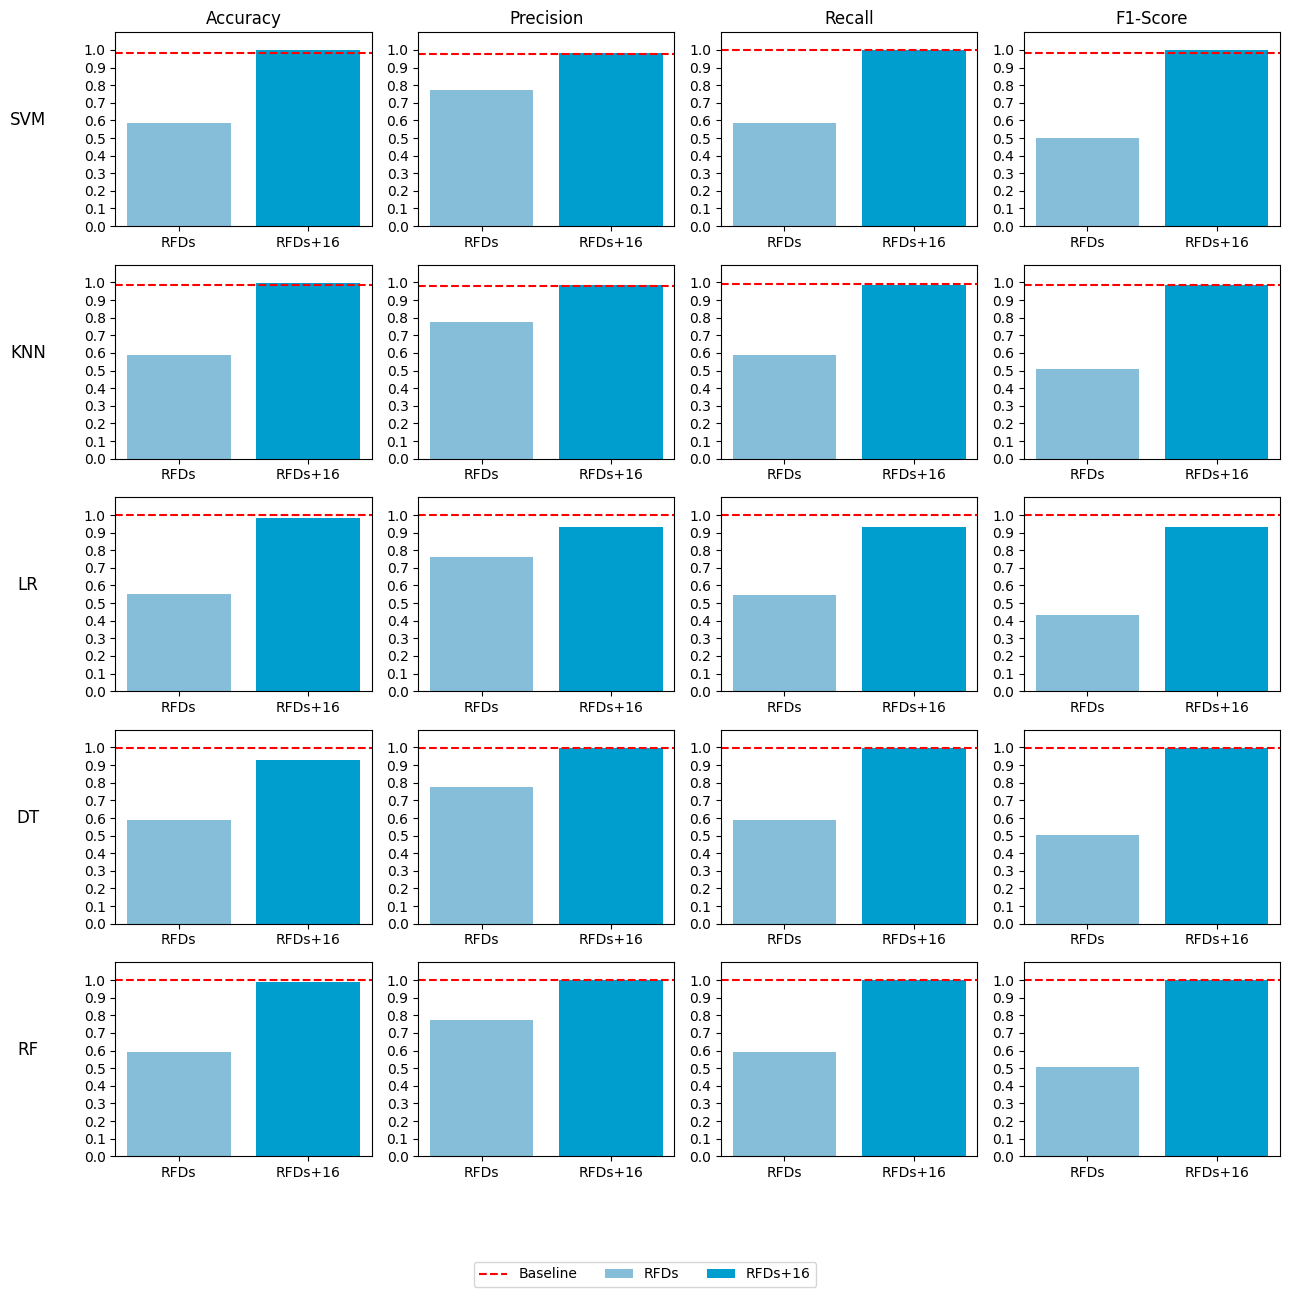

In [11]:
# Dati per le etichette
labels = ['Baseline', 'RFDs', 'RFDs+16']

values_matrix = np.array([
    # Accuracy
    [
        [0.981, 0.587, 0.998],      # SVM
        [0.986, 0.589, 0.997],      # KNN
        [0.997, 0.549, 0.983],      # LR
        [0.998, 0.589, 0.929],      # DT
        [0.998, 0.589, 0.986]       # RF
    ],
    # Precision
    [
        [0.976, 0.774, 0.983],      # SVM
        [0.979, 0.774, 0.986],      # KNN
        [0.997, 0.763, 0.930],      # LR
        [0.997, 0.774, 0.997],      # DT
        [0.998, 0.774, 0.998]       # RF
    ],
    # Recall
    [
        [0.997, 0.587, 0.998],      # SVM
        [0.993, 0.589, 0.986],      # KNN
        [0.997, 0.548, 0.929],      # LR
        [0.999, 0.589, 0.997],      # DT
        [0.999, 0.589, 0.998]       # RF
    ],
    # F1-Score
    [
        [0.981, 0.502, 0.998],      # SVM
        [0.986, 0.506, 0.986],      # KNN
        [0.997, 0.432, 0.929],      # LR
        [0.998, 0.506, 0.997],      # DT
        [0.998, 0.506, 0.998]       # RF
    ]
])

# Creazione della griglia 5x4 di subplots
fig, axs = plt.subplots(5, 4, figsize=(13, 12))

column_titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
row_titles = ['SVM', 'KNN', 'LR', 'DT', 'RF']
baseline_line = None

for i in range(5):
    for j in range(4):
        # barre per RFDs e RFDs+16
        bars = axs[i, j].bar(labels[1:], values_matrix[j, i, 1:], color=['#86beda', '#009dcf'])

        # linea tratteggiata per la Baseline
        baseline_line = axs[i, j].axhline(y=values_matrix[j, i, 0], color='red', linestyle='--', label='Baseline')

        # Imposta l'intervallo dell'asse y da 0 a 1.1
        axs[i, j].set_ylim(0, 1.1)

        # Imposta i tick dell'asse y con intervallo di 0.1
        axs[i, j].set_yticks(np.arange(0, 1.01, 0.1))

# Aggiunta etichette per le colonne
for ax, col in zip(axs[0], column_titles):
    ax.set_title(col)

# Aggiunta etichette per le righe
for ax, row in zip(axs[:, 0], row_titles):
    ax.set_ylabel(row, rotation=0, size='large', labelpad=40)

# leggenda
handles = [baseline_line, bars[0], bars[1]]
labels = ['Baseline', 'RFDs', 'RFDs+16']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# fig.suptitle('Performance metrics before and after feature engineering (Threshold 0 - Extent 0.1)', fontsize=14)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.tight_layout()
plt.show()

Soglia 2 - extent 0.1

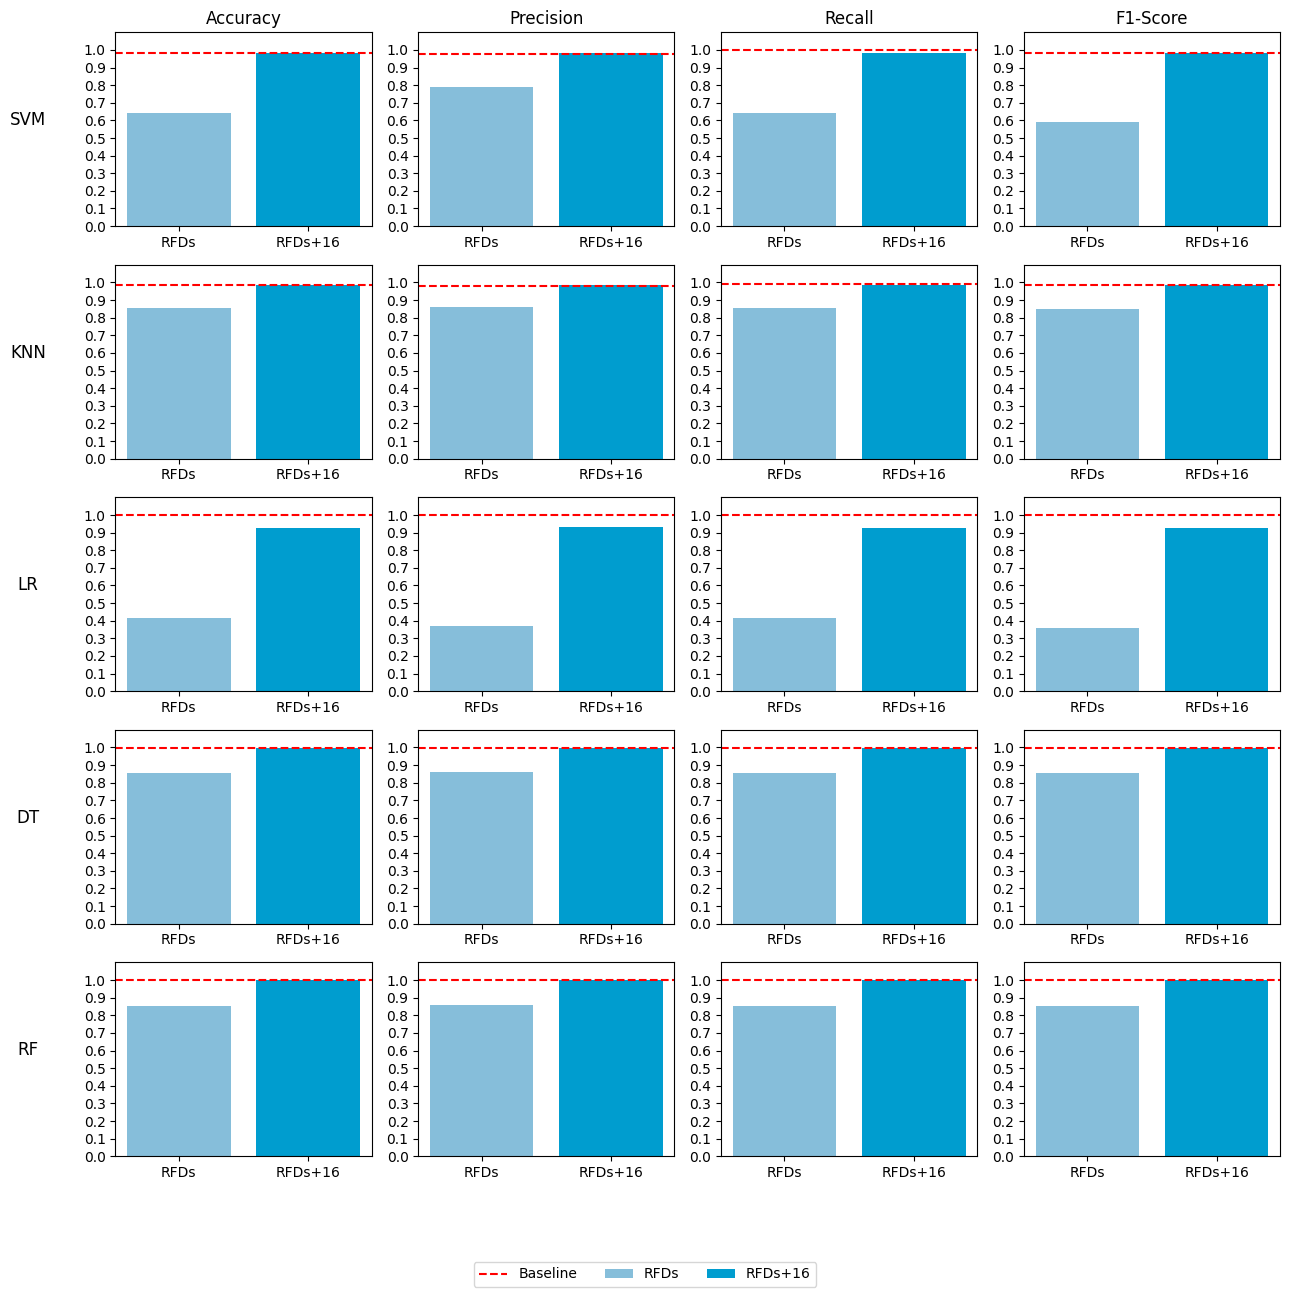

In [12]:
# Dati per le etichette
labels = ['Baseline', 'RFDs', 'RFDs+16']

values_matrix = np.array([
    # Accuracy
    [
        [0.981, 0.643, 0.982],      # SVM
        [0.986, 0.853, 0.986],      # KNN
        [0.997, 0.413, 0.928],      # LR
        [0.998, 0.854, 0.998],      # DT
        [0.998, 0.854, 0.998]       # RF
    ],
    # Precision
    [
        [0.976, 0.792, 0.982],      # SVM
        [0.979, 0.860, 0.986],      # KNN
        [0.997, 0.370, 0.930],      # LR
        [0.997, 0.861, 0.998],      # DT
        [0.998, 0.861, 0.998]       # RF
    ],
    # Recall
    [
        [0.997, 0.643, 0.982],      # SVM
        [0.993, 0.853, 0.986],      # KNN
        [0.997, 0.413, 0.928],      # LR
        [0.999, 0.854, 0.998],      # DT
        [0.999, 0.854, 0.998]       # RF
    ],
    # F1-Score
    [
        [0.981, 0.591, 0.982],      # SVM
        [0.986, 0.852, 0.986],      # KNN
        [0.997, 0.360, 0.928],      # LR
        [0.998, 0.853, 0.998],      # DT
        [0.998, 0.853, 0.998]       # RF
    ]
])

# Creazione della griglia 5x4 di subplots
fig, axs = plt.subplots(5, 4, figsize=(13, 12))

column_titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
row_titles = ['SVM', 'KNN', 'LR', 'DT', 'RF']
baseline_line = None

for i in range(5):
    for j in range(4):
        # barre per RFDs e RFDs+16
        bars = axs[i, j].bar(labels[1:], values_matrix[j, i, 1:], color=['#86beda', '#009dcf'])

        # linea tratteggiata per la Baseline
        baseline_line = axs[i, j].axhline(y=values_matrix[j, i, 0], color='red', linestyle='--', label='Baseline')

        # Imposta l'intervallo dell'asse y da 0 a 1.1
        axs[i, j].set_ylim(0, 1.1)

        # Imposta i tick dell'asse y con intervallo di 0.1
        axs[i, j].set_yticks(np.arange(0, 1.01, 0.1))

# Aggiunta etichette per le colonne
for ax, col in zip(axs[0], column_titles):
    ax.set_title(col)

# Aggiunta etichette per le righe
for ax, row in zip(axs[:, 0], row_titles):
    ax.set_ylabel(row, rotation=0, size='large', labelpad=40)

# leggenda
handles = [baseline_line, bars[0], bars[1]]
labels = ['Baseline', 'RFDs', 'RFDs+16']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# fig.suptitle('Performance metrics before and after feature engineering (Threshold 2 - Extent 0.1)', fontsize=14)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.tight_layout()
plt.show()

Soglia 4 - extent 0.1

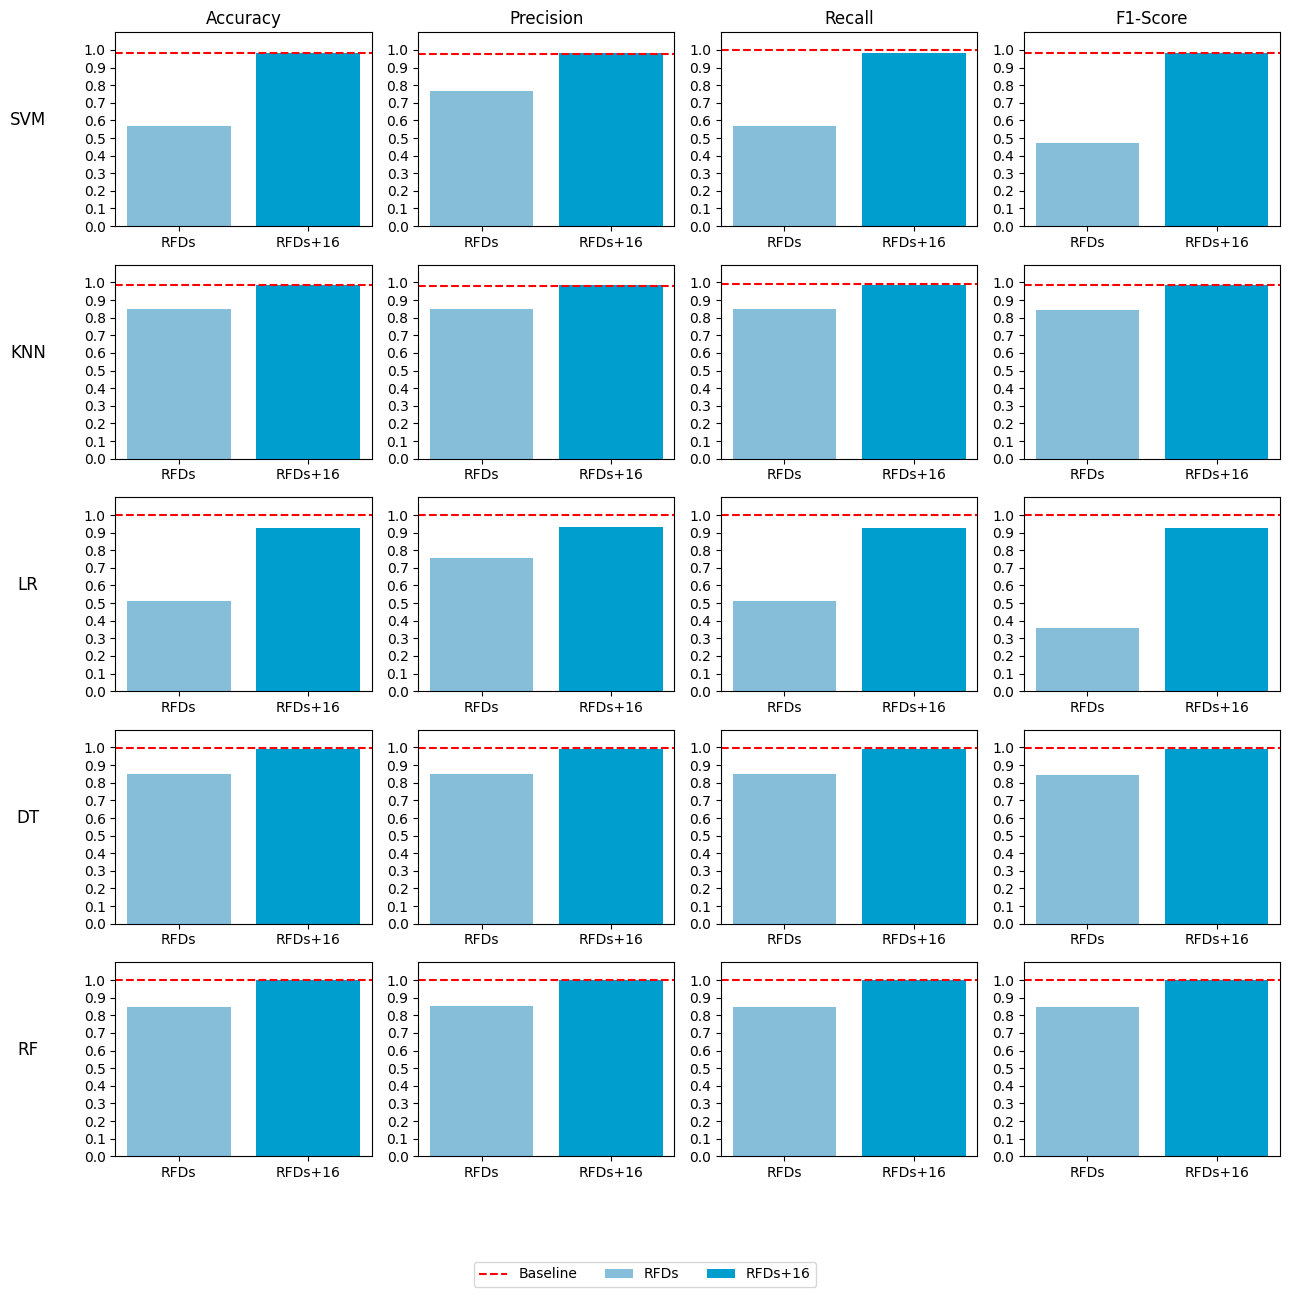

In [13]:
# Dati per le etichette
labels = ['Baseline', 'RFDs', 'RFDs+16']

values_matrix = np.array([
    # Accuracy
    [
        [0.981, 0.570, 0.980],      # SVM
        [0.986, 0.847, 0.986],      # KNN
        [0.997, 0.511, 0.928],      # LR
        [0.998, 0.847, 0.994],      # DT
        [0.998, 0.847, 0.999]       # RF
    ],
    # Precision
    [
        [0.976, 0.769, 0.980],      # SVM
        [0.979, 0.852, 0.986],      # KNN
        [0.997, 0.753, 0.930],      # LR
        [0.997, 0.852, 0.994],      # DT
        [0.998, 0.852, 0.999]       # RF
    ],
    # Recall
    [
        [0.997, 0.569, 0.980],      # SVM
        [0.993, 0.847, 0.986],      # KNN
        [0.997, 0.510, 0.928],      # LR
        [0.999, 0.847, 0.994],      # DT
        [0.999, 0.847, 0.999]       # RF
    ],
    # F1-Score
    [
        [0.981, 0.472, 0.980],      # SVM
        [0.986, 0.846, 0.986],      # KNN
        [0.997, 0.357, 0.928],      # LR
        [0.998, 0.846, 0.994],      # DT
        [0.998, 0.846, 0.999]       # RF
    ]
])

# Creazione della griglia 5x4 di subplots
fig, axs = plt.subplots(5, 4, figsize=(13, 12))

column_titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
row_titles = ['SVM', 'KNN', 'LR', 'DT', 'RF']
baseline_line = None

for i in range(5):
    for j in range(4):
        # barre per RFDs e RFDs+16
        bars = axs[i, j].bar(labels[1:], values_matrix[j, i, 1:], color=['#86beda', '#009dcf'])

        # linea tratteggiata per la Baseline
        baseline_line = axs[i, j].axhline(y=values_matrix[j, i, 0], color='red', linestyle='--', label='Baseline')

        # Imposta l'intervallo dell'asse y da 0 a 1.1
        axs[i, j].set_ylim(0, 1.1)

        # Imposta i tick dell'asse y con intervallo di 0.1
        axs[i, j].set_yticks(np.arange(0, 1.01, 0.1))

# Aggiunta etichette per le colonne
for ax, col in zip(axs[0], column_titles):
    ax.set_title(col)

# Aggiunta etichette per le righe
for ax, row in zip(axs[:, 0], row_titles):
    ax.set_ylabel(row, rotation=0, size='large', labelpad=40)

# leggenda
handles = [baseline_line, bars[0], bars[1]]
labels = ['Baseline', 'RFDs', 'RFDs+16']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# fig.suptitle('Performance metrics before and after feature engineering (Threshold 4 - Extent 0.1)', fontsize=14)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.tight_layout()
plt.show()